In [4]:
empty_files(['features_Walking.txt', 'features_Walking_scaled.csv', 'processed_data_files.txt'])
# Preprocessing.plot_accelerometer(r'csvfile_test1.csv', 2.5, 1.5)
# Preprocessing.plot_accelerometer(r'csvfile_test2.csv', 2.5, 1.5)

pre = Preprocessing('Walking')
pre.windowing(r"csvfile_test1.csv", r"notebook dingen/Walking_part_2.mp4", # csvfile_test1.csv or csvfile_test_gyro_2
              start_offset=2.5, stop_offset=5, size=1, offset=0.2, epsilon=0.01, do_plot=False, do_scale=False)
pre.windowing(r"csvfile_test2.csv", r"notebook dingen/Walking_part_1.mp4", # csvfile_test1.csv or csvfile_test_gyro_1
              start_offset=2.5, stop_offset=5, size=1, offset=0.2, epsilon=0.01, do_plot=False, do_scale=True)

fa: 8, sensors_amount: 3


13.624 1


[0.01, 0.075, 0.46, 0.455]
Enter the index or the name of one of the following labels. Enter 'n' to add a new label:
1. walking
2. running
3. stairs_up
4. stairs_down


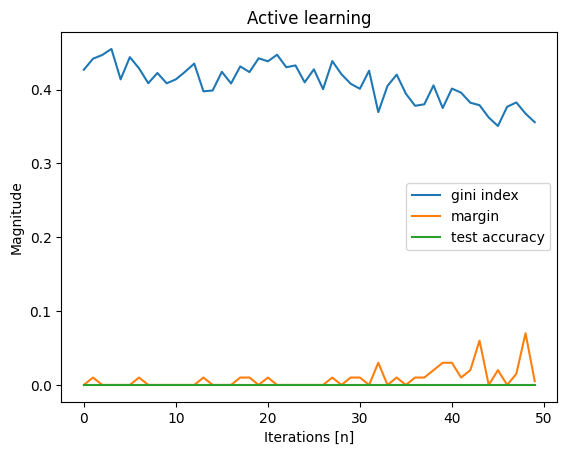

In [6]:
# labels = set()
# with open(r'features_Walking_scaled.csv') as f:
#     for line in f:
#         labels |= {line.strip().split(',')[1]}
# print(labels)
labels = ['walking', 'running', 'stairs_up', 'stairs_down']
# vid = VideoLabeler(labels)
# vid.labeling

AL = Active_learning(r'features_Walking_scaled.csv', labels, 1)
AL.training(50)
AL.plotting()
AL.write_to_file()